## Decision Trees
Used for both regression and classification, even for multiouts

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=['petal length (cm)', 'petal width (cm)'],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

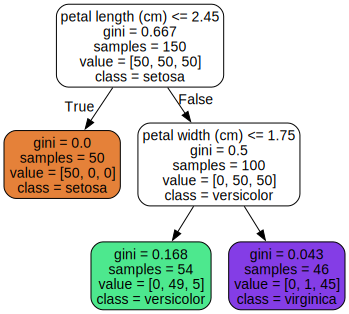

In [6]:

from graphviz import Source

Source.from_file("iris_tree.dot")

In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])

### CART

Classification And Regression Tree


This is used to teach the decision trees, it divides the training data into 2 subsets until `max_depth` (hyperparameter) until the max subset with the least Gini impurity

Finding the optimal tree is O(exp(n)), need to make a trade off


You can change your impurity function to `entropy` by changing the hyperparameter `criterion='entropy'`

in most cases this doesn't really matter, gini is a bit faster, entropy is a bit more balanced

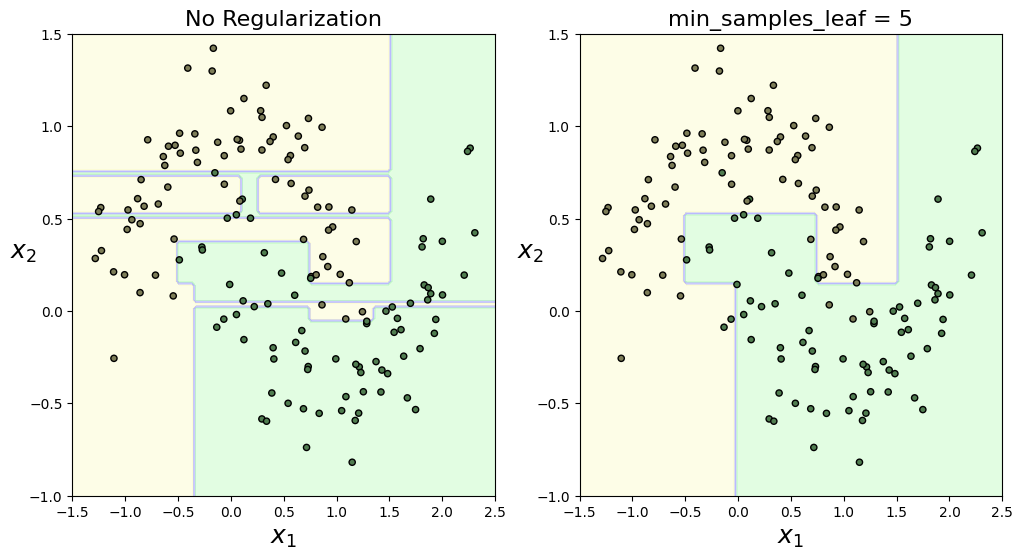

In [11]:
# Regularization Hyperparameters

from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42) 
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

# Plotting Decision Boundaries

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], iris=False, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap2, edgecolor='k', s=20)
    if iris:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Now use the function to plot the decision boundaries for your classifiers
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5])
plt.title("No Regularization", fontsize=16)
plt.subplot(122)
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes=[-1.5, 2.5, -1, 1.5])
plt.title("min_samples_leaf = {}".format(tree_clf2.min_samples_leaf), fontsize=16)
plt.show()


# The left plot is overfitting, and the right plot is a more reasonable decision boundary.

In [15]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)

tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [16]:
tree_clf2.score(X_moons_test, y_moons_test)

# The right model performs better on the test set.

0.92

In [17]:
# Regression Trees

import numpy as np
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)

# Quadratic training set + noise
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad**2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

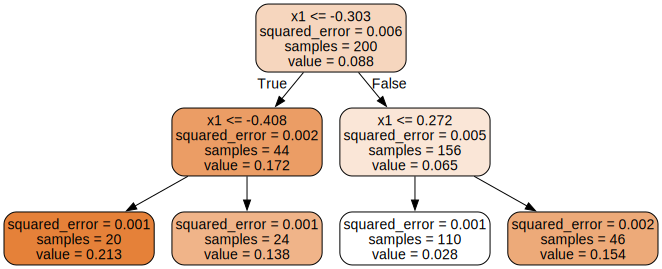

In [19]:
# Visualize
export_graphviz(
        tree_reg,
        out_file="regression_tree.dot",
        feature_names=['x1'],
        rounded=True,
        filled=True
    )

Source.from_file("regression_tree.dot")

In [21]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(iris.data)
tree_clf_pca = DecisionTreeClassifier(random_state=42)
tree_clf_pca.fit(X_iris_rotated, y)


DecisionTreeClassifier(random_state=42)